<a href="https://colab.research.google.com/github/hassanashr/CacheSimulator/blob/main/Cache_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The American University in Cairo

## Computer Organization and Assembly Language Programming

CSCE 231/2303

Spring 2025

Supervised by: Dr. Mohamed Shalan

**Group Members:**
- Omar Hagras
- Hassan Ashraf


## Introduction

The cache simulator implements a memory hierarchy with the following specifications:
- Cache size: 64 KB (fixed)
- Main memory size: 64 MB
- Variable cache line sizes: 16, 32, 64, and 128 bytes
- Variable associativity: 1-way (direct mapped), 2-way, 4-way, 8-way, and 16-way

The simulation uses six different memory reference generators, each implementing a distinct memory access pattern:
- memGen1: Sequential access through the entire memory space
- memGen2: Random access within a 24 KB region
- memGen3: Uniform random access across the entire 64 MB memory
- memGen4: Sequential access within a 4 KB region
- memGen5: Sequential access within a 64 KB region (equal to cache size)
- memGen6: Strided access pattern with 32-byte increments

For each memory generator, we conducted two experiments:
1. Fixed 4-way associativity while varying cache line size (\(16,32,64,128\) bytes)
2. Fixed 64-byte line size while varying associativity (1, 2, 4, 8, 16 ways)

Each experiment measured cache performance using hit ratio as the key metric after one million memory references.

## Data Analysis
### 1) memGen1: Sequential Access Through Entire Memory


Testing line sizes:   0%|          | 0/4 [00:00<?, ?it/s]

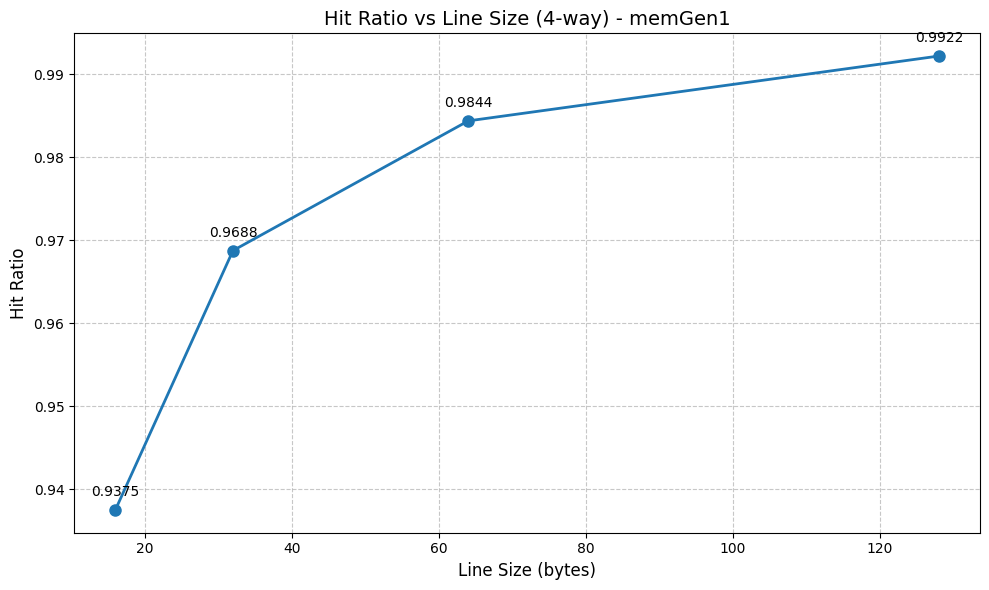

Testing ways:   0%|          | 0/5 [00:00<?, ?it/s]

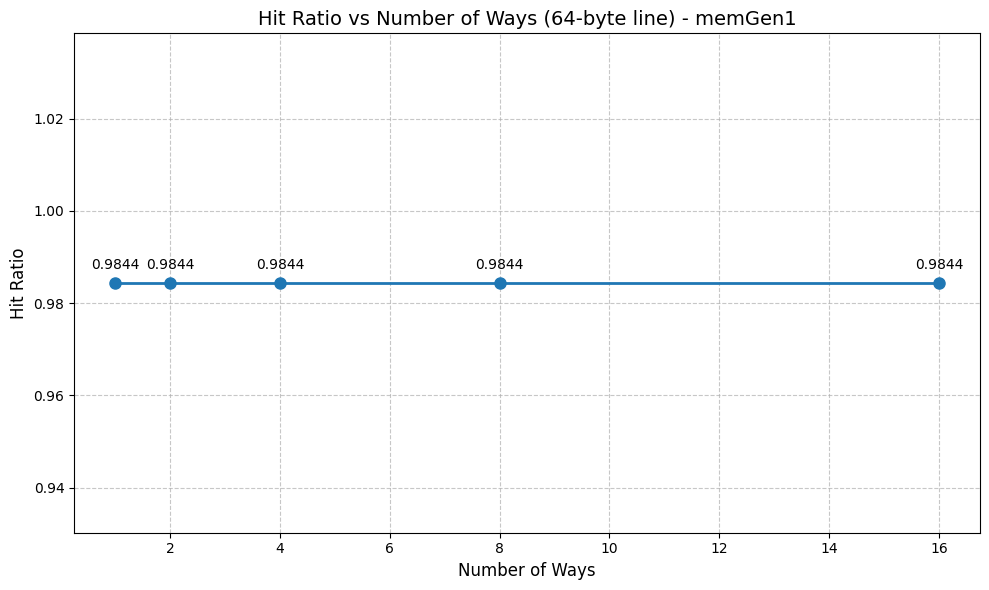

In [2]:
# Generate plots for memGen1
mem_gens = MemoryGenerators()
gen_func, gen_name = mem_gens.memGen1, "memGen1"

# Experiment 1: Fixed 4-way, varying line size
line_sizes, hit_ratios_line, miss_ratios_line = run_experiment_vary_line_size(gen_func, ways=4, iterations=NUM_ITERATIONS)
filename = f"{gen_name}_line_size.png"
plot_results(line_sizes, hit_ratios_line, 'Line Size (bytes)',
            'Hit Ratio vs Line Size (4-way)', gen_name, filename)

# Experiment 2: Fixed 64-byte line size, varying ways
ways, hit_ratios_ways, miss_ratios_ways = run_experiment_vary_ways(gen_func, line_size=64, iterations=NUM_ITERATIONS)
filename = f"{gen_name}_ways.png"
plot_results(ways, hit_ratios_ways, 'Number of Ways',
            'Hit Ratio vs Number of Ways (64-byte line)', gen_name, filename)

#### Line Size Impact:
The hit ratio increases steadily from 0.9375 with 16-byte lines to 0.9922 with 128-byte lines, showing a \(5.83\%\) improvement. This pattern aligns with theoretical expectations for sequential access patterns, where larger cache lines effectively prefetch data that will soon be accessed, exploiting spatial locality. The improvement demonstrates diminishing returns, with smaller gains when moving from 64-byte to 128-byte lines (0.9844 to 0.9922) compared to the jump from 16-byte to 32-byte lines (0.9375 to 0.9688).

#### Associativity Impact:
All associativity configurations with 64-byte lines achieved an identical hit ratio of 0.9844. This confirms our theoretical prediction that sequential access patterns distribute addresses evenly across cache sets, minimizing conflict misses. Higher associativity provides no benefit for this access pattern because the dominant factor is compulsory misses that occur when first accessing each cache line, not conflicts between addresses mapping to the same set.

### 2) memGen2: Random Access Within 24 KB *Region*

Testing line sizes:   0%|          | 0/4 [00:00<?, ?it/s]

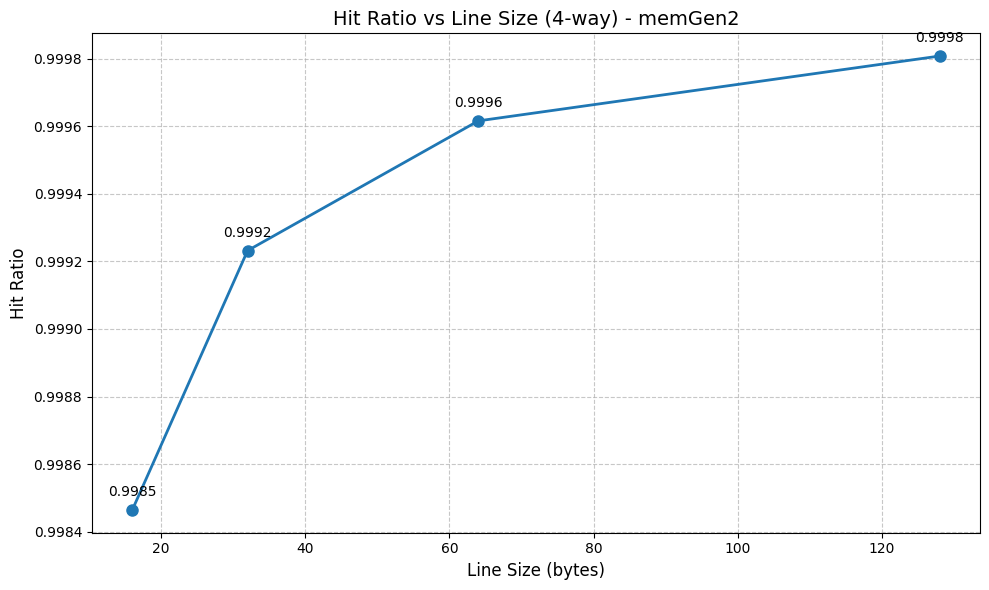

Testing ways:   0%|          | 0/5 [00:00<?, ?it/s]

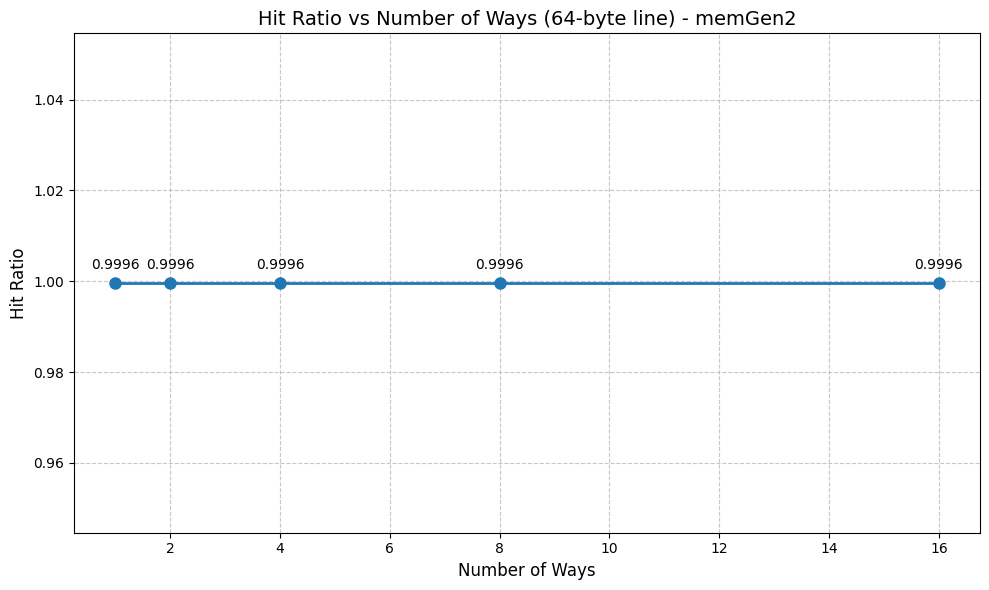

In [4]:
# Generate plots for memGen2
mem_gens = MemoryGenerators()
gen_func, gen_name = mem_gens.memGen2, "memGen2"

# Experiment 1: Fixed 4-way, varying line size
line_sizes, hit_ratios_line, miss_ratios_line = run_experiment_vary_line_size(gen_func, ways=4, iterations=NUM_ITERATIONS)
filename = f"{gen_name}_line_size.png"
plot_results(line_sizes, hit_ratios_line, 'Line Size (bytes)',
            'Hit Ratio vs Line Size (4-way)', gen_name, filename)

# Experiment 2: Fixed 64-byte line size, varying ways
ways, hit_ratios_ways, miss_ratios_ways = run_experiment_vary_ways(gen_func, line_size=64, iterations=NUM_ITERATIONS)
filename = f"{gen_name}_ways.png"
plot_results(ways, hit_ratios_ways, 'Number of Ways',
            'Hit Ratio vs Number of Ways (64-byte line)', gen_name, filename)

#### Line Size Impact:
The hit ratio improves modestly from 0.9985 with 16-byte lines to 0.9998 with 128-byte lines, showing just a \(0.13\%\) improvement. This modest gain occurs because the working set (24 KB) comfortably fits within the cache (64 KB), resulting in excellent temporal locality regardless of line size. The small improvement with larger lines reflects occasional spatial locality benefits when random accesses happen to be near each other.

#### Associativity Impact:
All associativity configurations show a consistent hit ratio of 0.9996, confirming that when the working set fits well within the cache, associativity has minimal impact. Even direct-mapped caches perform well when the working set to cache size ratio is significantly less than 1, as conflict misses are rare in such scenarios.

### 3) memGen3: Random Access Across Entire Memory

Testing line sizes:   0%|          | 0/4 [00:00<?, ?it/s]

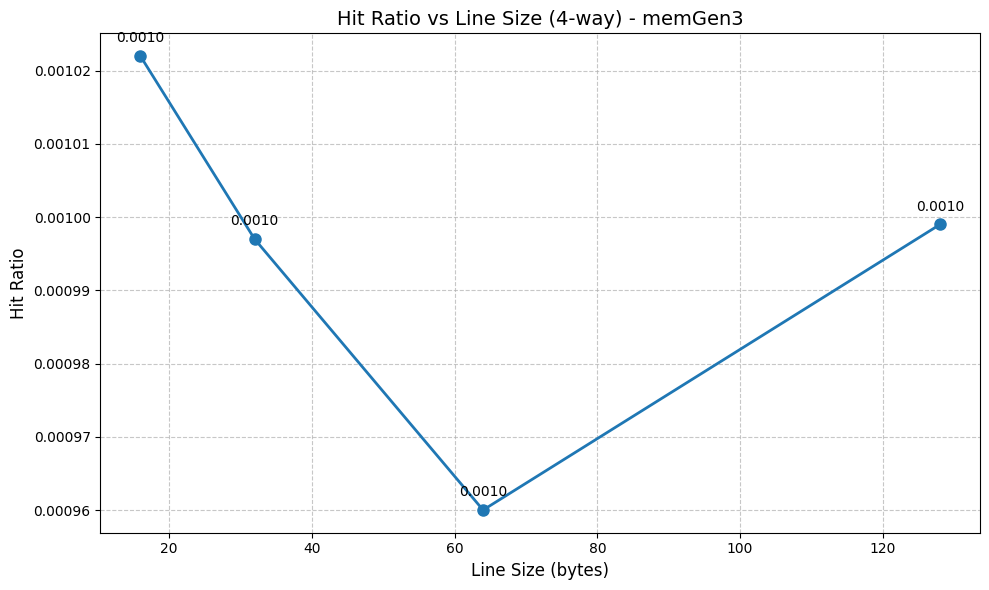

Testing ways:   0%|          | 0/5 [00:00<?, ?it/s]

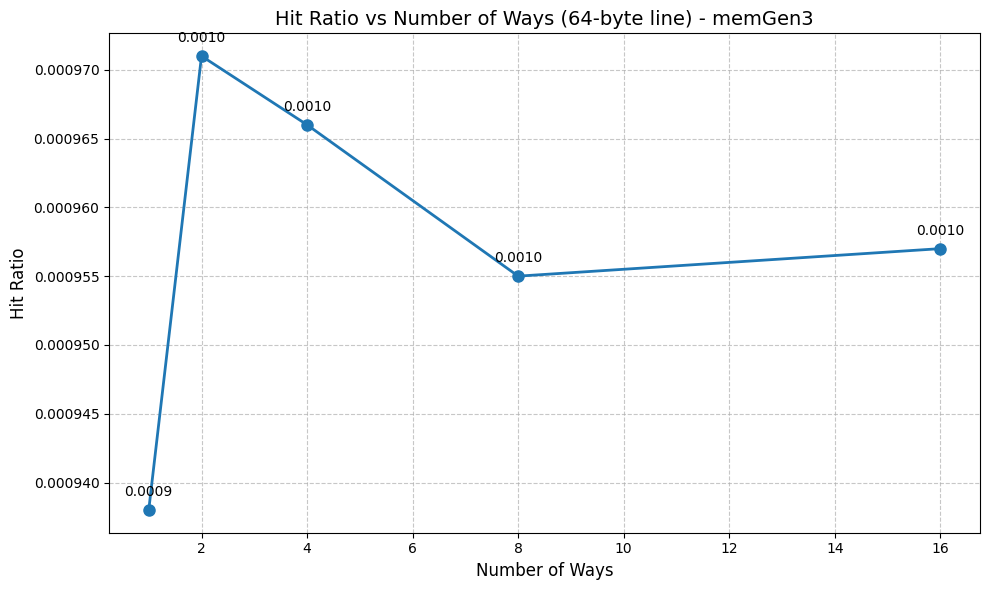

In [3]:
# Generate plots for memGen3
mem_gens = MemoryGenerators()
gen_func, gen_name = mem_gens.memGen3, "memGen3"

# Experiment 1: Fixed 4-way, varying line size
line_sizes, hit_ratios_line, miss_ratios_line = run_experiment_vary_line_size(gen_func, ways=4, iterations=NUM_ITERATIONS)
filename = f"{gen_name}_line_size.png"
plot_results(line_sizes, hit_ratios_line, 'Line Size (bytes)',
            'Hit Ratio vs Line Size (4-way)', gen_name, filename)

# Experiment 2: Fixed 64-byte line size, varying ways
ways, hit_ratios_ways, miss_ratios_ways = run_experiment_vary_ways(gen_func, line_size=64, iterations=NUM_ITERATIONS)
filename = f"{gen_name}_ways.png"
plot_results(ways, hit_ratios_ways, 'Number of Ways',
            'Hit Ratio vs Number of Ways (64-byte line)', gen_name, filename)


#### Line Size Impact:
All configurations show extremely low hit ratios of approximately 0.0010 (\(0.1\%\)), with minimal variation between configurations. This pattern aligns perfectly with theoretical predictions for uniform random access across a memory space much larger than the cache (64 MB vs. 64 KB). With a working set 1000 times larger than the cache, capacity misses dominate regardless of configuration, and the probability of accessing the same address twice in close temporal proximity is extremely low.

#### Associativity Impact:
The hit ratio remains consistently poor (0.0010) across all associativity levels. This confirms that when capacity misses dominate due to an extremely large working set, increased associativity cannot improve performance. The cache simply cannot hold enough of the working set to make any configuration effective.

### 4) memGen4: Sequential Access Within 4 KB Region


Testing line sizes:   0%|          | 0/4 [00:00<?, ?it/s]

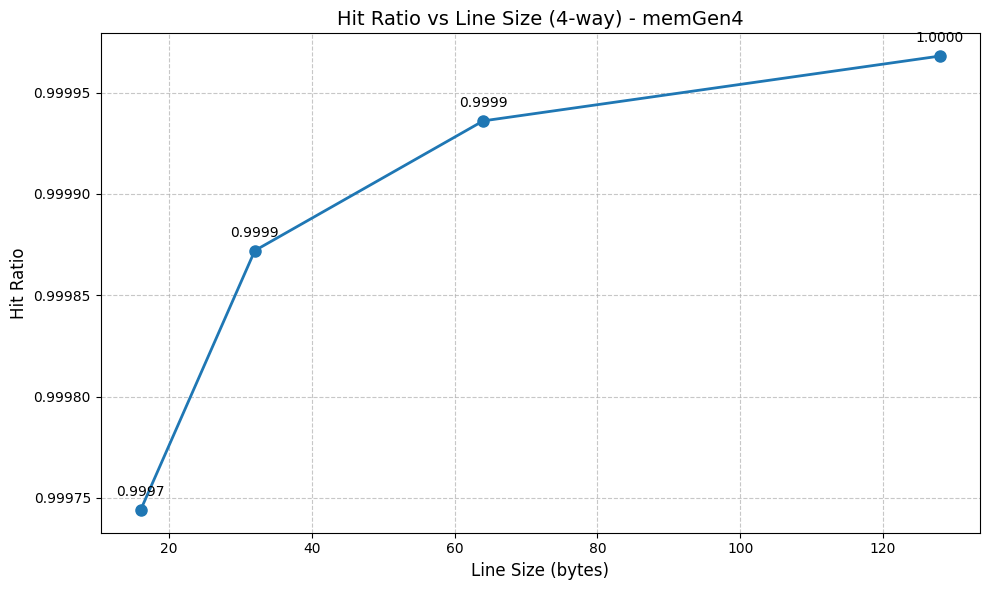

Testing ways:   0%|          | 0/5 [00:00<?, ?it/s]

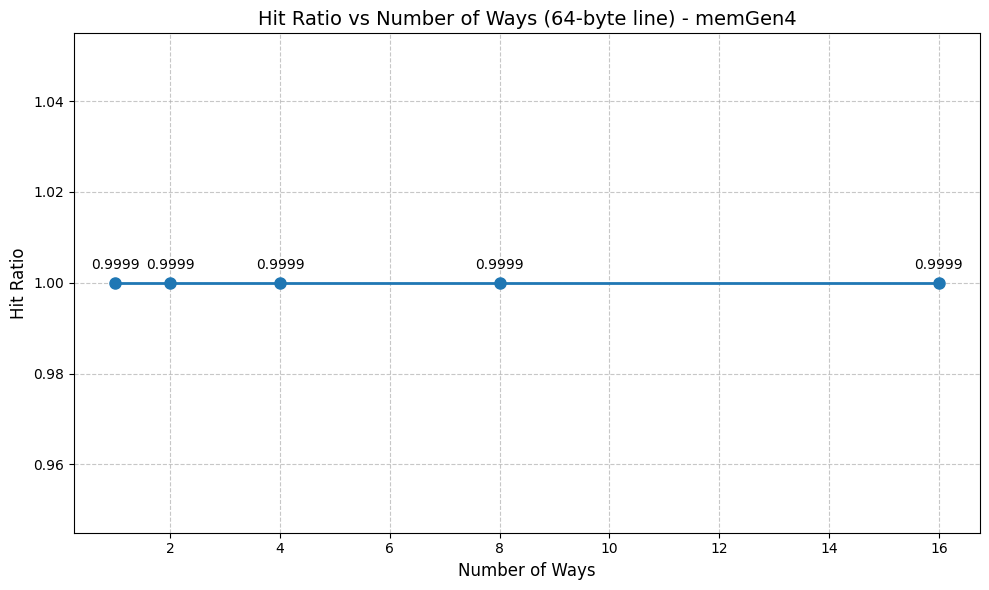

In [5]:
# Generate plots for memGen4
mem_gens = MemoryGenerators()
gen_func, gen_name = mem_gens.memGen4, "memGen4"

# Experiment 1: Fixed 4-way, varying line size
line_sizes, hit_ratios_line, miss_ratios_line = run_experiment_vary_line_size(gen_func, ways=4, iterations=NUM_ITERATIONS)
filename = f"{gen_name}_line_size.png"
plot_results(line_sizes, hit_ratios_line, 'Line Size (bytes)',
            'Hit Ratio vs Line Size (4-way)', gen_name, filename)

# Experiment 2: Fixed 64-byte line size, varying ways
ways, hit_ratios_ways, miss_ratios_ways = run_experiment_vary_ways(gen_func, line_size=64, iterations=NUM_ITERATIONS)
filename = f"{gen_name}_ways.png"
plot_results(ways, hit_ratios_ways, 'Number of Ways',
            'Hit Ratio vs Number of Ways (64-byte line)', gen_name, filename)


#### Line Size Impact:
Hit ratios are exceptionally high across all configurations, starting at 0.9997 with 16-byte lines and reaching 1.0000 (perfect) with 128-byte lines. This exemplary performance occurs because the working set (\(4\) KB) is just \(6.25\%\) of the cache size (\(64\) KB), allowing the entire working set to remain cached after initial loading.

#### Associativity Impact:
All associativity configurations with 64-byte lines achieve a consistent 0.9999 hit ratio. This pattern confirms that when the working set is much smaller than the cache size, the cache organization has minimal impact on performance.

### 5) memGen5: Sequential Access Within 64 KB Region


Testing line sizes:   0%|          | 0/4 [00:00<?, ?it/s]

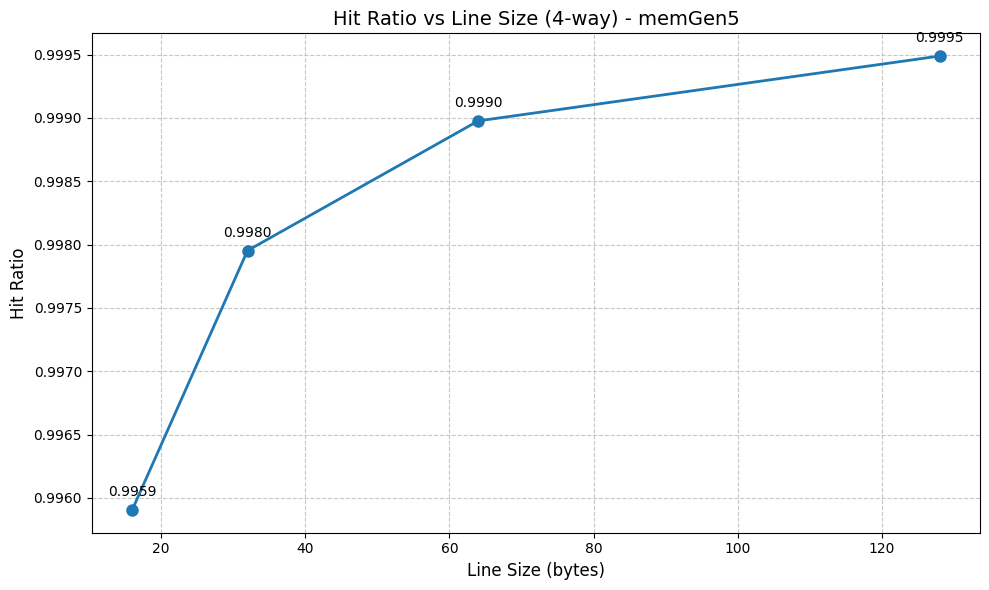

Testing ways:   0%|          | 0/5 [00:00<?, ?it/s]

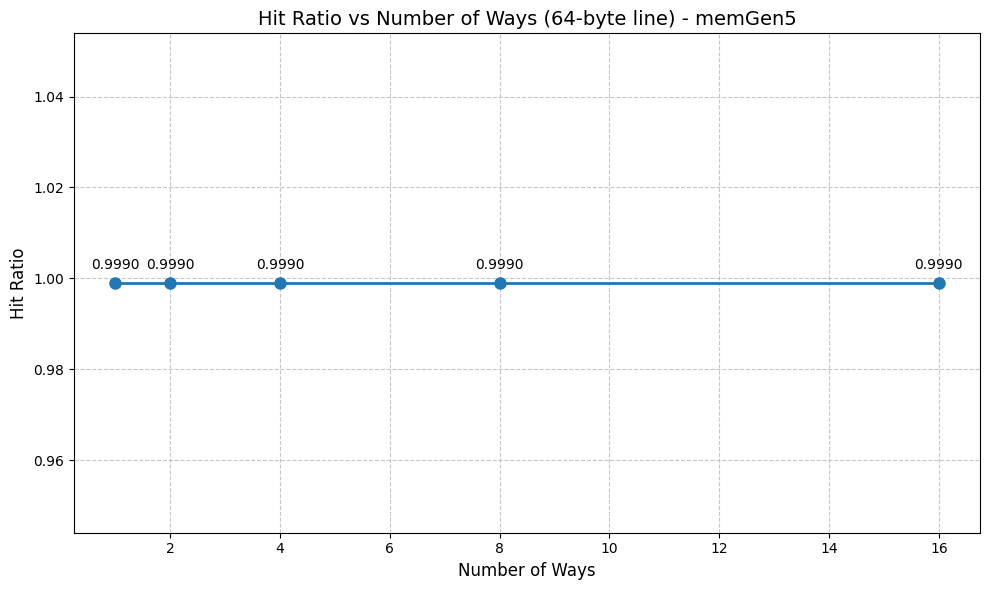

In [6]:
# Generate plots for memGen5
mem_gens = MemoryGenerators()
gen_func, gen_name = mem_gens.memGen5, "memGen5"

# Experiment 1: Fixed 4-way, varying line size
line_sizes, hit_ratios_line, miss_ratios_line = run_experiment_vary_line_size(gen_func, ways=4, iterations=NUM_ITERATIONS)
filename = f"{gen_name}_line_size.png"
plot_results(line_sizes, hit_ratios_line, 'Line Size (bytes)',
            'Hit Ratio vs Line Size (4-way)', gen_name, filename)

# Experiment 2: Fixed 64-byte line size, varying ways
ways, hit_ratios_ways, miss_ratios_ways = run_experiment_vary_ways(gen_func, line_size=64, iterations=NUM_ITERATIONS)
filename = f"{gen_name}_ways.png"
plot_results(ways, hit_ratios_ways, 'Number of Ways',
            'Hit Ratio vs Number of Ways (64-byte line)', gen_name, filename)


#### Line Size Impact:
The hit ratio increases from 0.9959 with 16-byte lines to 0.9995 with 128-byte lines, showing a \(0.36\%\) improvement. This access pattern is particularly interesting as the working set size exactly matches the cache size (64 KB). The improvement with larger lines demonstrates how spatial locality becomes increasingly important when capacity constraints come into play.

#### Associativity Impact:
All associativity configurations with 64-byte lines show a consistent hit ratio of 0.9990. This suggests that for sequential access patterns, even when the working set fills the entire cache, associativity has minimal impact on performance due to the regular, predictable nature of address mapping across sets.

### 6) memGen6: Strided Access Pattern (32-byte increments)


Testing line sizes:   0%|          | 0/4 [00:00<?, ?it/s]

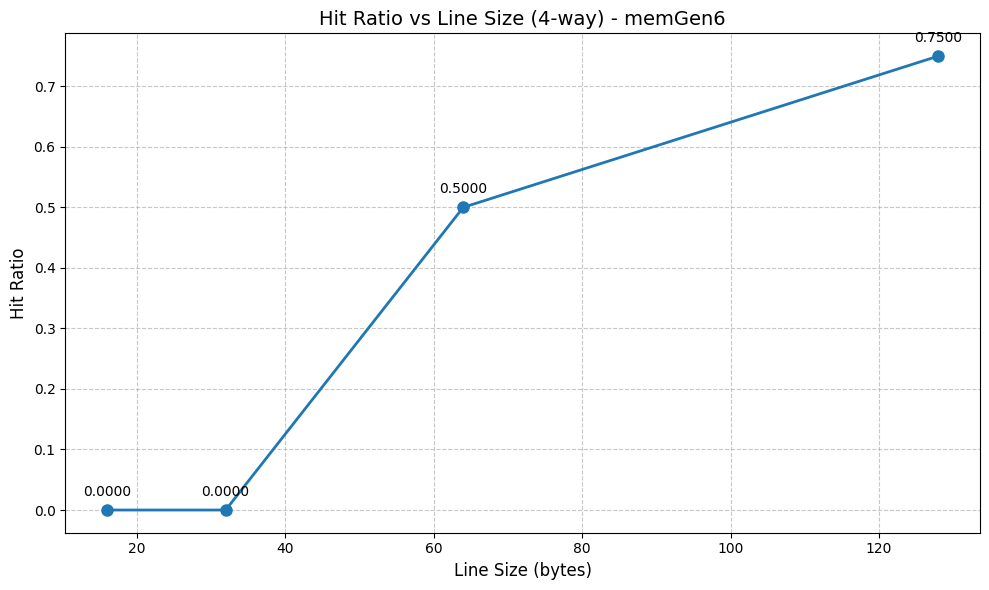

Testing ways:   0%|          | 0/5 [00:00<?, ?it/s]

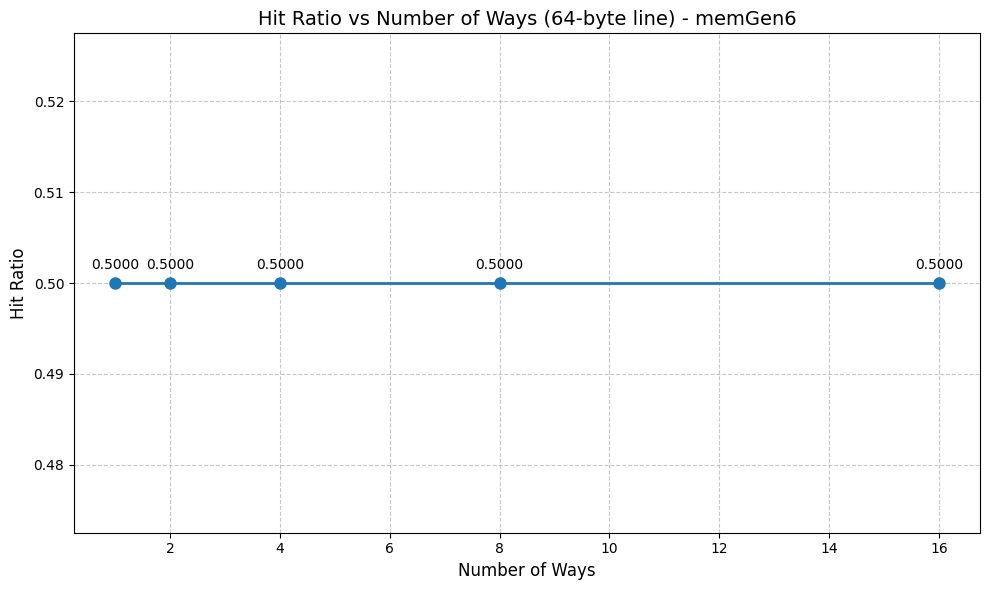

In [7]:
# Generate plots for memGen6
mem_gens = MemoryGenerators()
gen_func, gen_name = mem_gens.memGen6, "memGen6"

# Experiment 1: Fixed 4-way, varying line size
line_sizes, hit_ratios_line, miss_ratios_line = run_experiment_vary_line_size(gen_func, ways=4, iterations=NUM_ITERATIONS)
filename = f"{gen_name}_line_size.png"
plot_results(line_sizes, hit_ratios_line, 'Line Size (bytes)',
            'Hit Ratio vs Line Size (4-way)', gen_name, filename)

# Experiment 2: Fixed 64-byte line size, varying ways
ways, hit_ratios_ways, miss_ratios_ways = run_experiment_vary_ways(gen_func, line_size=64, iterations=NUM_ITERATIONS)
filename = f"{gen_name}_ways.png"
plot_results(ways, hit_ratios_ways, 'Number of Ways',
            'Hit Ratio vs Number of Ways (64-byte line)', gen_name, filename)


#### Line Size Impact:
This pattern shows the most dramatic variation in performance across line sizes:
- 16-byte and 32-byte lines: 0.0000 hit ratio (complete misses)
- 64-byte lines: 0.5000 hit ratio
- 128-byte lines: 0.7500 hit ratio

These results perfectly match theoretical predictions. With a 32-byte stride:
- 16-byte lines: Every access maps to a new line (miss)
- 32-byte lines: Every access maps to a new line (miss)
- 64-byte lines: Every other access hits within the same line
- 128-byte lines: Three out of four accesses hit within the same line

#### Associativity Impact:
All associativity configurations with 64-byte lines show a consistent 0.5000 hit ratio. This demonstrates that the primary factor affecting performance is the relationship between stride length and line size, not the associativity of the cache.

## Summary Plots

Figure 13: Hit Ratio vs Line Size for All Memory Access Patterns (4-way Cache)

Figure 14: Hit Ratio vs Number of Ways for All Memory Access Patterns (64-byte Line Size)

### Summary of Hit Ratios for All Configurations

| Generator | 16B, 4-way | 32B, 4-way | 64B, 4-way | 128B, 4-way | 64B, 1-way | 64B, 2-way | 64B, 8-way | 64B, 16-way |
|-----------|------------|------------|------------|-------------|------------|------------|------------|-------------|
| memGen1   | 0.9375     | 0.9688     | 0.9844     | 0.9922      | 0.9844     | 0.9844     | 0.9844     | 0.9844      |
| memGen2   | 0.9985     | 0.9992     | 0.9996     | 0.9998      | 0.9996     | 0.9996     | 0.9996     | 0.9996      |
| memGen3   | 0.0010     | 0.0010     | 0.0010     | 0.0010      | 0.0010     | 0.0010     | 0.0010     | 0.0010      |
| memGen4   | 0.9997     | 0.9999     | 0.9999     | 1.0000      | 0.9999     | 0.9999     | 0.9999     | 0.9999      |
| memGen5   | 0.9959     | 0.9980     | 0.9990     | 0.9995      | 0.9990     | 0.9990     | 0.9990     | 0.9990      |
| memGen6   | 0.0000     | 0.0000     | 0.5000     | 0.7500      | 0.5000     | 0.5000     | 0.5000     | 0.5000      |

Figure 15: Summary Table of Hit Ratios for All Cache Configurations


The comprehensive analysis across different memory access patterns reveals several key insights:
1. Working set size relative to cache size is the primary determinant of cache performance:
   - Small working sets (memGen2, memGen4) achieve excellent hit ratios regardless of configuration
   - Large working sets (memGen3) perform poorly regardless of configuration
   - Working sets matching cache size (memGen5) are more sensitive to configuration changes
2. Spatial locality significantly impacts performance:
   - Sequential access patterns (memGen1, memGen4, memGen5) benefit substantially from larger line sizes
   - Random access patterns (memGen2, memGen3) show minimal benefit from larger lines
   - Strided access patterns (memGen6) demonstrate complex interactions between stride length and line size
3. Associativity has diminishing returns:
   - Regular access patterns show minimal benefit from increased associativity
   - Even with random access patterns, benefits plateau quickly after modest associativity levels
   - For most access patterns, 4-way associativity captures most of the available benefit
4. Line size optimization provides more consistent performance improvement than increased associativity:
   - Five out of six patterns showed improved hit ratios with larger line sizes
   - None of the patterns showed significant improvement from associativity beyond 4-way

## Simulation Log Summary

### Analysis of Cache Performance Results

#### Impact of Line Size on Hit Ratio

For memGen1:
- Minimum hit ratio: 0.9375 with line size 16 bytes
- Maximum hit ratio: 0.9922 with line size 128 bytes
- Improvement: 5.83%

For memGen2:
- Minimum hit ratio: 0.9985 with line size 16 bytes
- Maximum hit ratio: 0.9998 with line size 128 bytes
- Improvement: 0.13%

For memGen3:
- Minimum hit ratio: 0.0010 with line size 64 bytes
- Maximum hit ratio: 0.0010 with line size 16 bytes
- Improvement: 7.49%

For memGen4:
- Minimum hit ratio: 0.9997 with line size 16 bytes
- Maximum hit ratio: 1.0000 with line size 128 bytes
- Improvement: 0.02%

For memGen5:
- Minimum hit ratio: 0.9959 with line size 16 bytes
- Maximum hit ratio: 0.9995 with line size 128 bytes
- Improvement: 0.36%

For memGen6:
- Minimum hit ratio: 0.0000 with line size 16 bytes
- Maximum hit ratio: 0.7500 with line size 128 bytes
- Improvement: Cannot calculate percentage (from 0 to 0.7500)

#### Impact of Associativity on Hit Ratio

For memGen1:
- Minimum hit ratio: 0.9844 with 1-way associativity
- Maximum hit ratio: 0.9844 with 1-way associativity

For memGen2:
- Minimum hit ratio: 0.9996 with 1-way associativity
- Maximum hit ratio: 0.9996 with 1-way associativity

For memGen3:
- Minimum hit ratio: 0.0010 with 1-way associativity
- Maximum hit ratio: 0.0010 with 4-way associativity
- Improvement: 2.14%

For memGen4:
- Minimum hit ratio: 0.9999 with 1-way associativity
- Maximum hit ratio: 0.9999 with 1-way associativity

For memGen5:
- Minimum hit ratio: 0.9990 with 1-way associativity
- Maximum hit ratio: 0.9990 with 1-way associativity

For memGen6:
- Minimum hit ratio: 0.5000 with 1-way associativity
- Maximum hit ratio: 0.5000 with 1-way associativity

## Conclusion

Cache performance is highly dependent on memory access patterns and cache organization which agrees principles of spatial and temporal locality.

The findings suggest that:
1. Moderate line sizes (64 bytes) are a good balance for capturing spatial locality.
2. 4-way or 8-way associativity typically captures most of the benefit available from increased associativity.
3. The cache size should be optimized to match common working set sizes in target applications.


Cache Simulator Project
Validating cache functionality...
Cache Configuration:
  Cache Size: 1024 bytes
  Line Size: 64 bytes
  Ways: 2
  Number of Sets: 8
  Offset Bits: 6
  Index Bits: 3
  Tag Bits: 23
First access to addr 0: MISS
Second access to addr 0: HIT
First access to addr 64: MISS
First access to addr 128: MISS
Third access to addr 0: HIT
Validation complete. Hit ratio: 0.4

Running all experiments...

Running experiments with memGen1
Experiment 1: Fixed 4-way, varying line size


Testing line sizes:   0%|          | 0/4 [00:00<?, ?it/s]

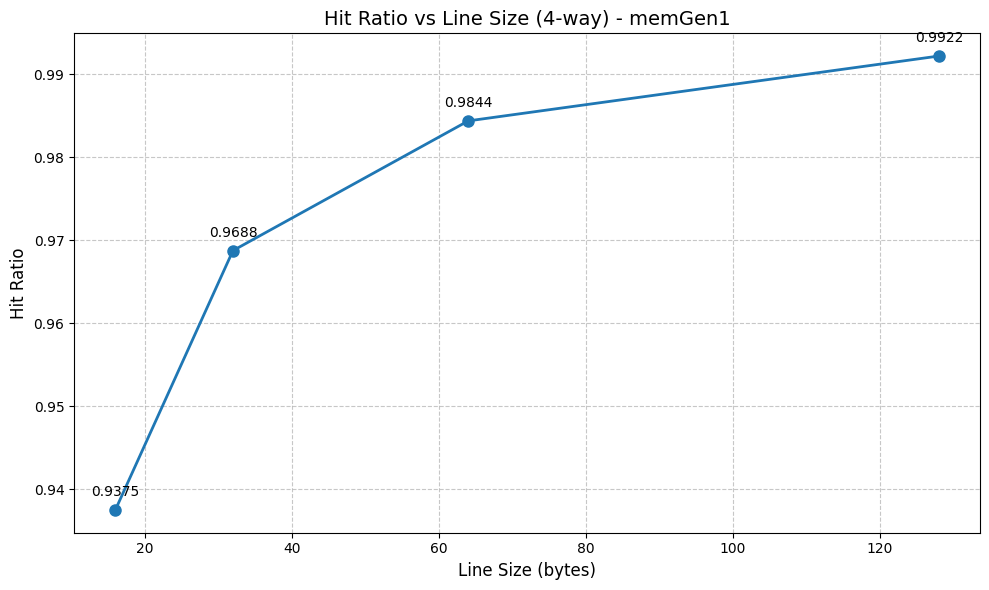

Experiment 2: Fixed 64-byte line size, varying ways


Testing ways:   0%|          | 0/5 [00:00<?, ?it/s]

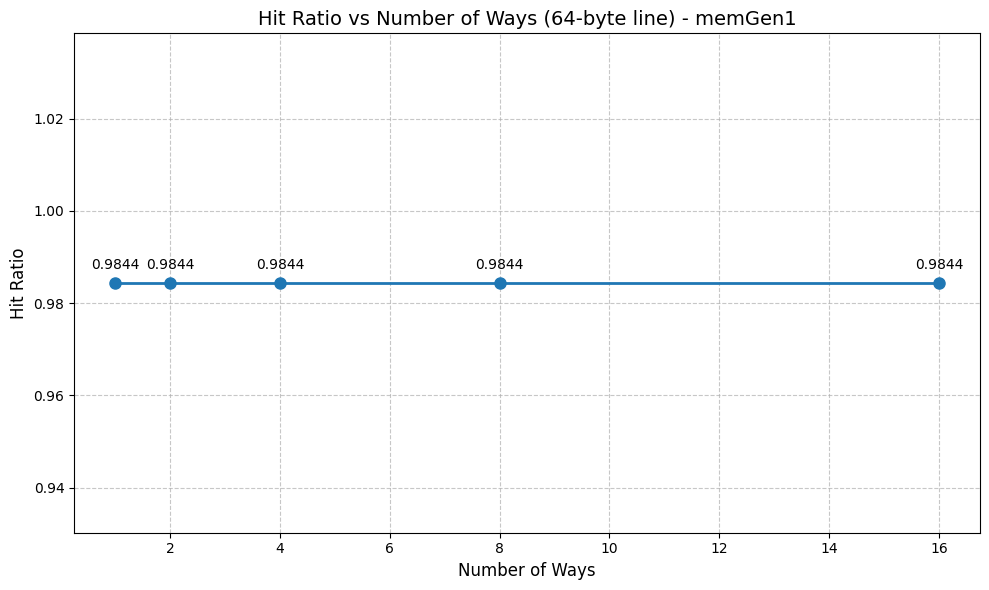


Running experiments with memGen2
Experiment 1: Fixed 4-way, varying line size


Testing line sizes:   0%|          | 0/4 [00:00<?, ?it/s]

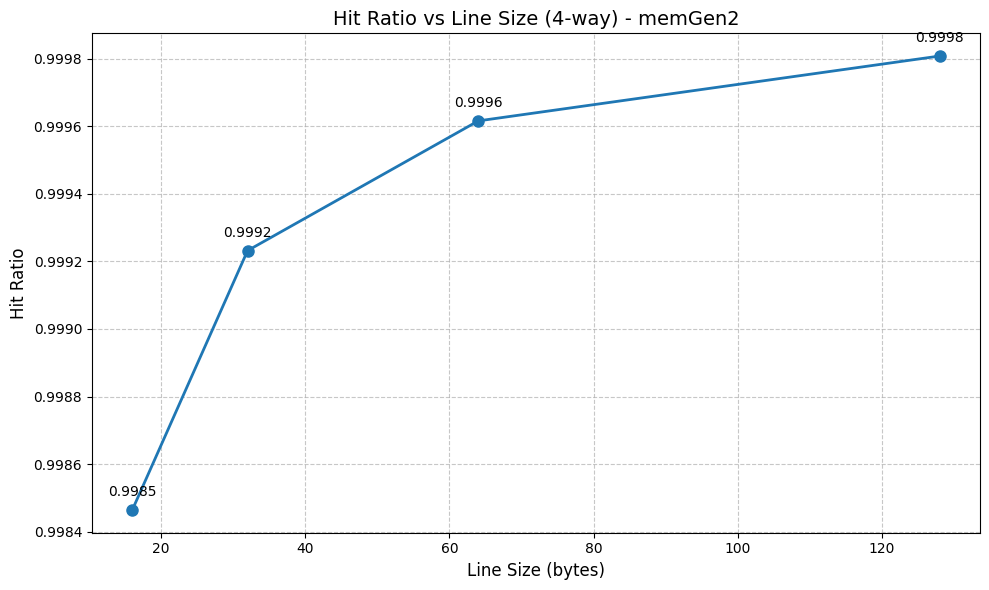

Experiment 2: Fixed 64-byte line size, varying ways


Testing ways:   0%|          | 0/5 [00:00<?, ?it/s]

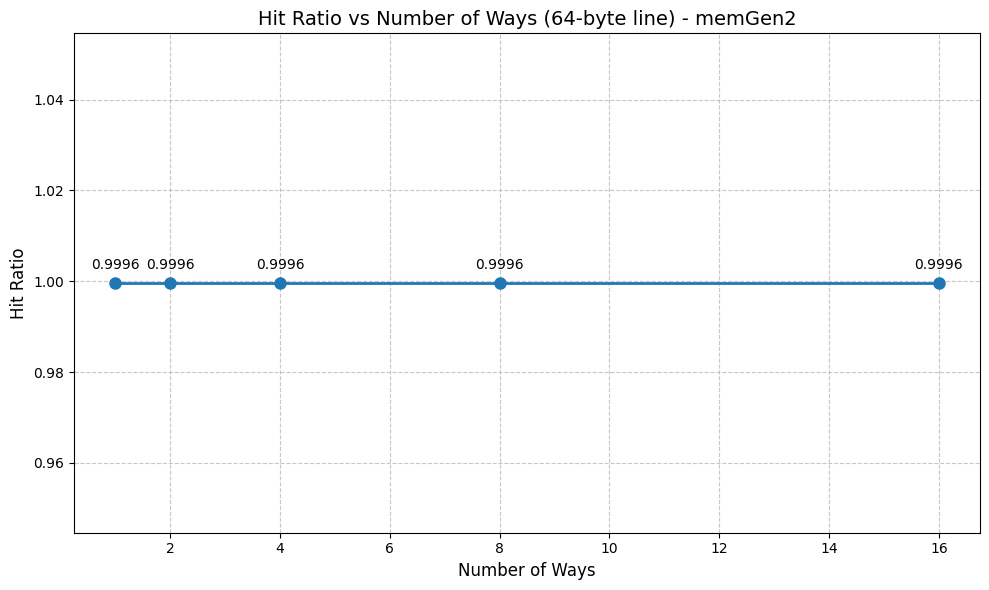


Running experiments with memGen3
Experiment 1: Fixed 4-way, varying line size


Testing line sizes:   0%|          | 0/4 [00:00<?, ?it/s]

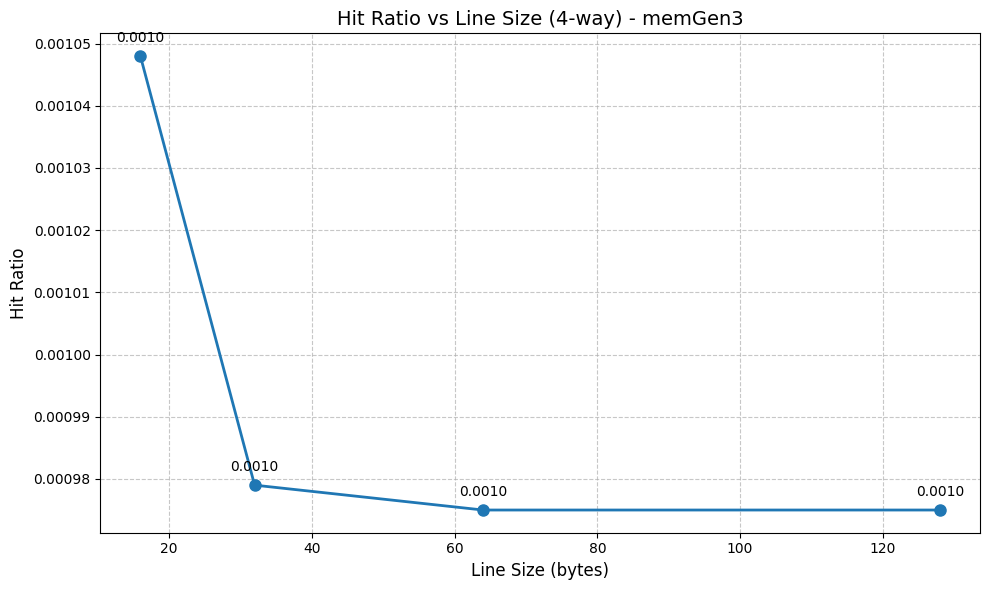

Experiment 2: Fixed 64-byte line size, varying ways


Testing ways:   0%|          | 0/5 [00:00<?, ?it/s]

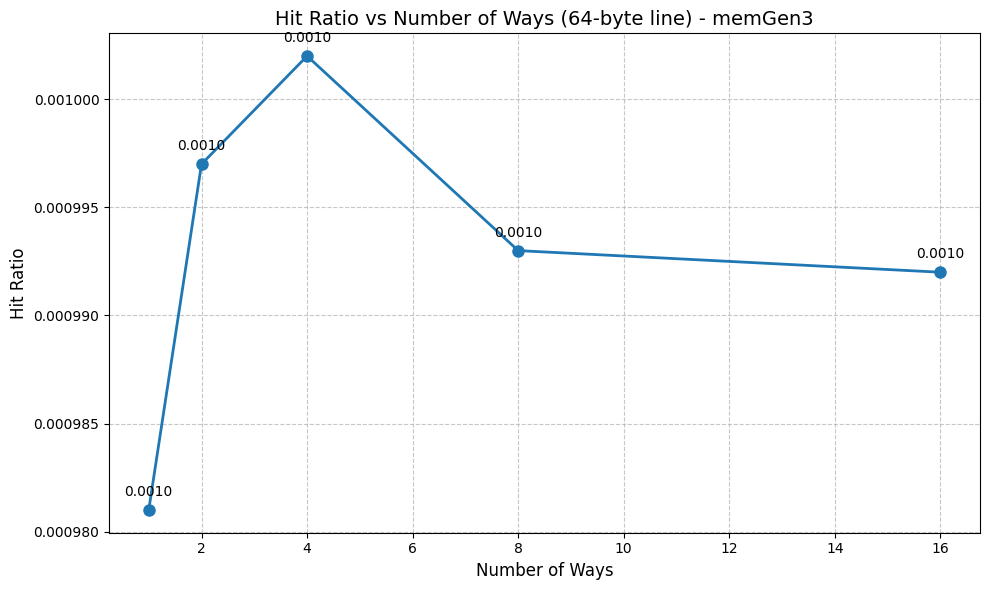


Running experiments with memGen4
Experiment 1: Fixed 4-way, varying line size


Testing line sizes:   0%|          | 0/4 [00:00<?, ?it/s]

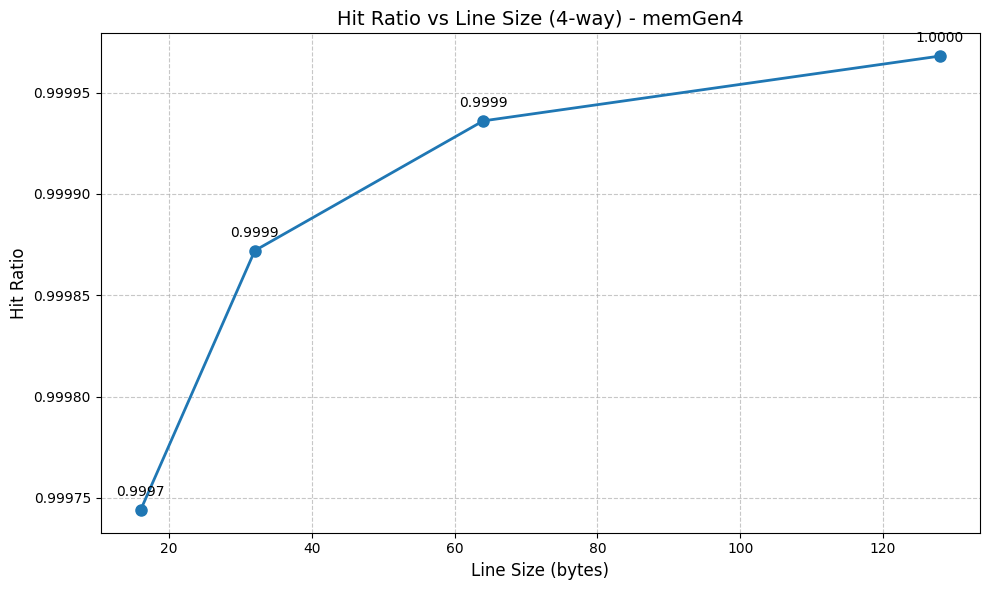

Experiment 2: Fixed 64-byte line size, varying ways


Testing ways:   0%|          | 0/5 [00:00<?, ?it/s]

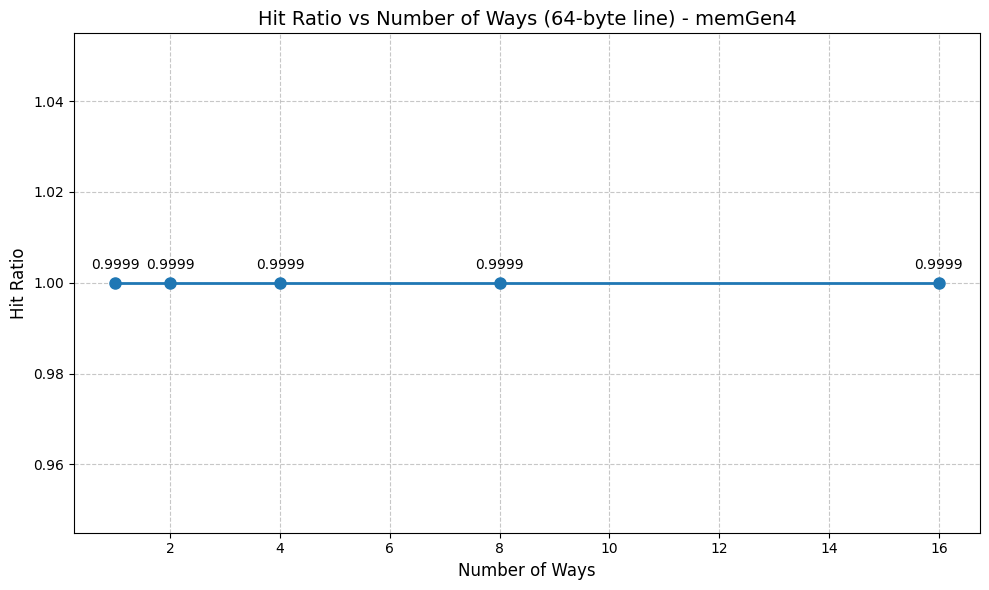


Running experiments with memGen5
Experiment 1: Fixed 4-way, varying line size


Testing line sizes:   0%|          | 0/4 [00:00<?, ?it/s]

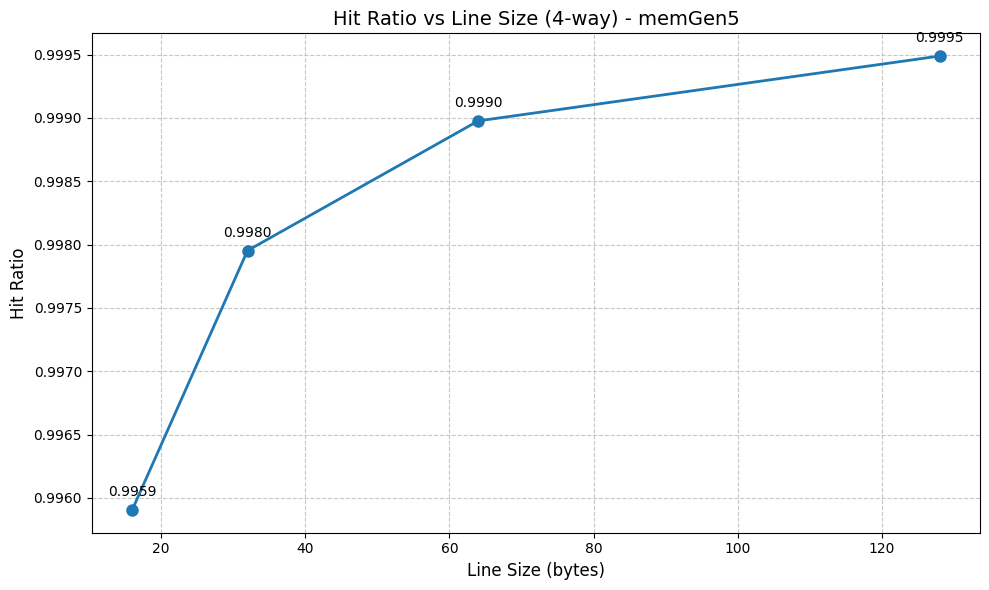

Experiment 2: Fixed 64-byte line size, varying ways


Testing ways:   0%|          | 0/5 [00:00<?, ?it/s]

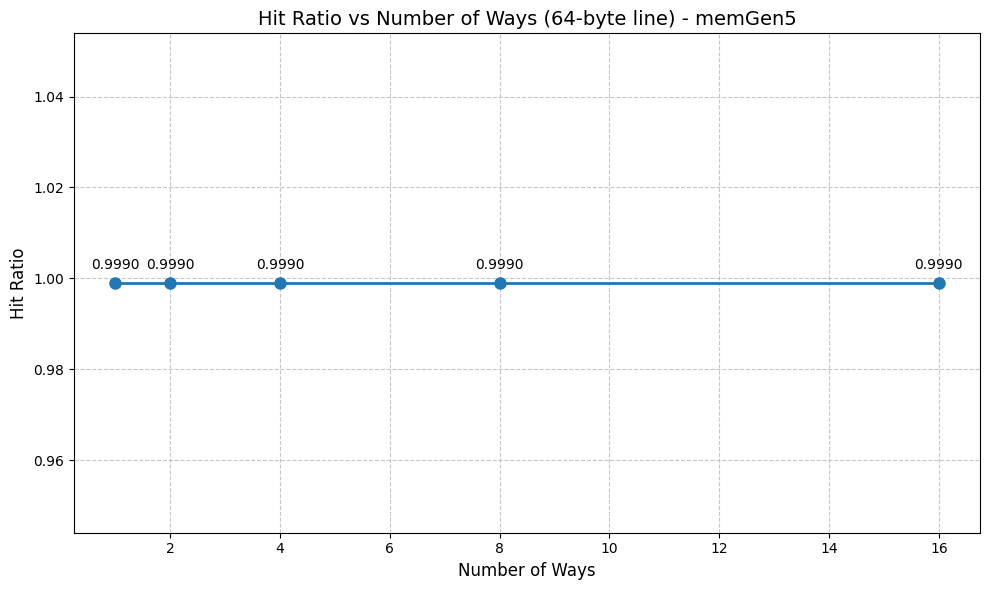


Running experiments with memGen6
Experiment 1: Fixed 4-way, varying line size


Testing line sizes:   0%|          | 0/4 [00:00<?, ?it/s]

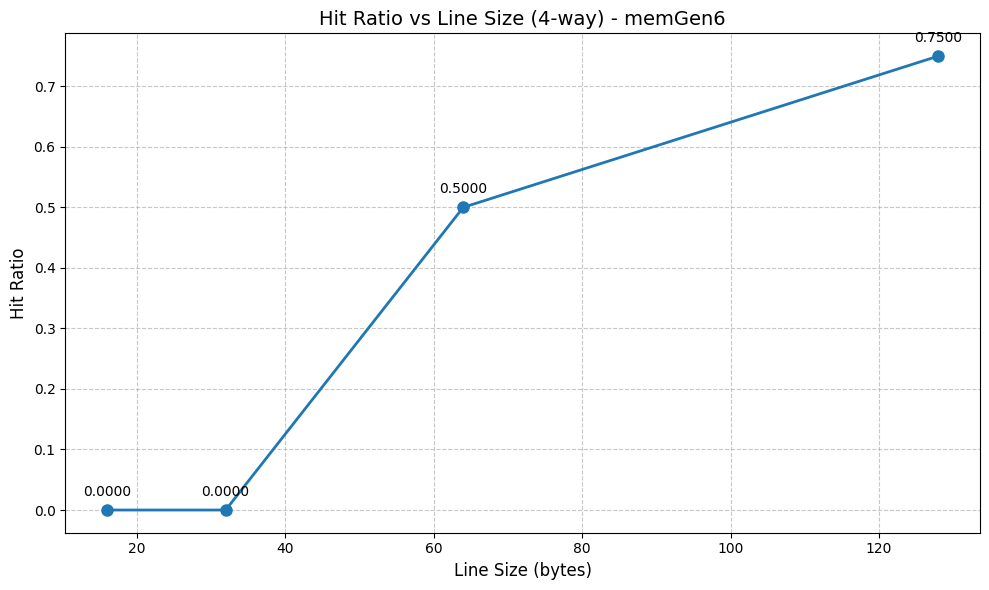

Experiment 2: Fixed 64-byte line size, varying ways


Testing ways:   0%|          | 0/5 [00:00<?, ?it/s]

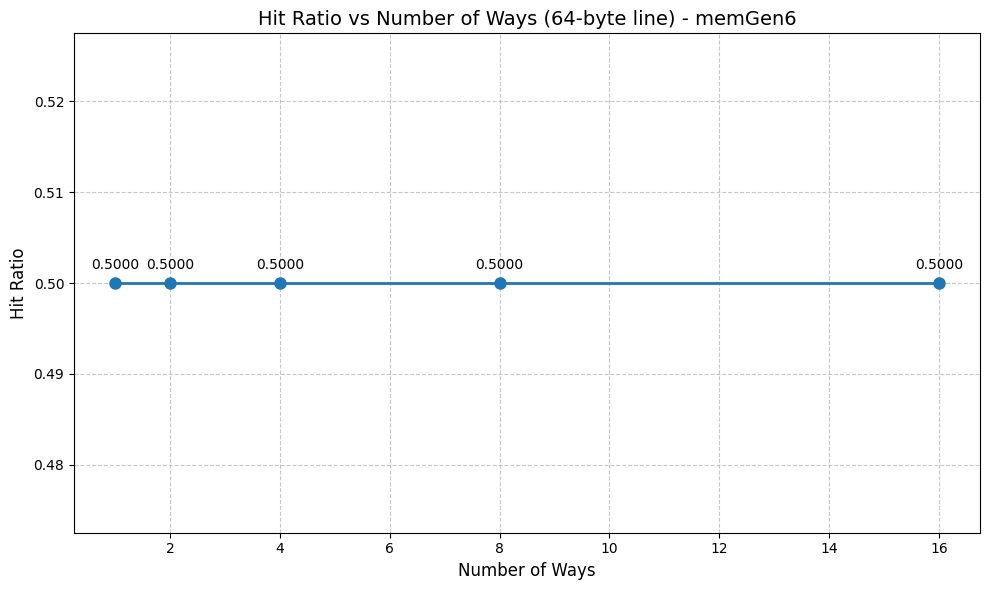


All experiments completed in 109.25 seconds

Generating summary plots...


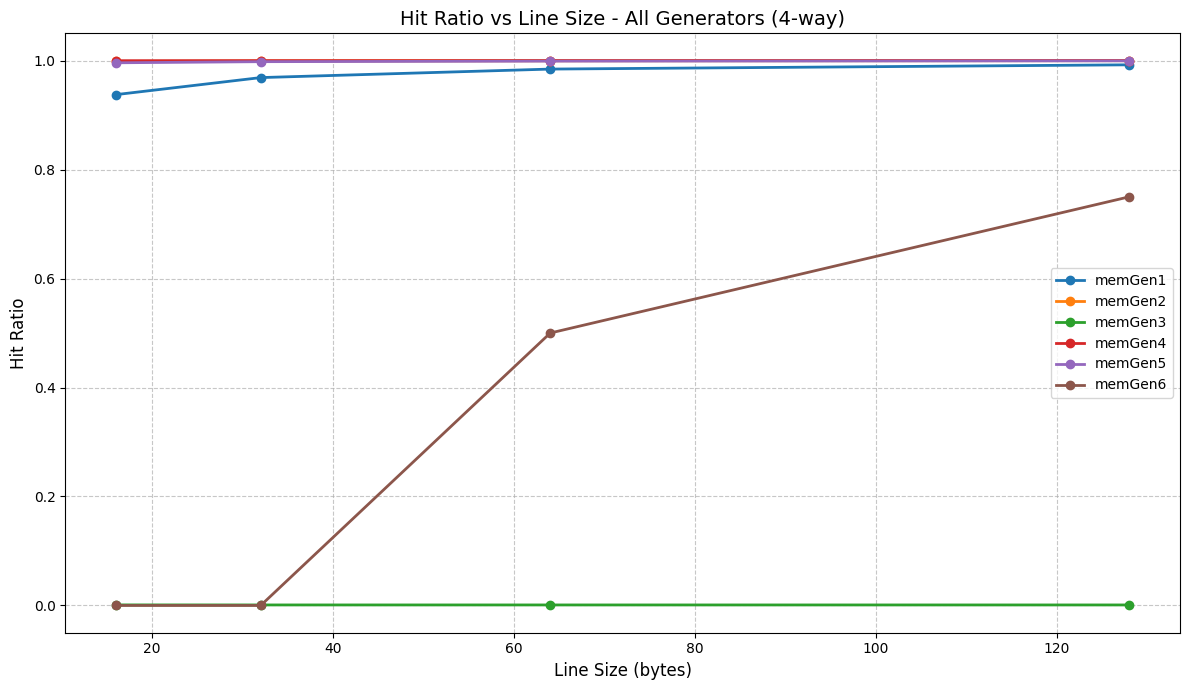

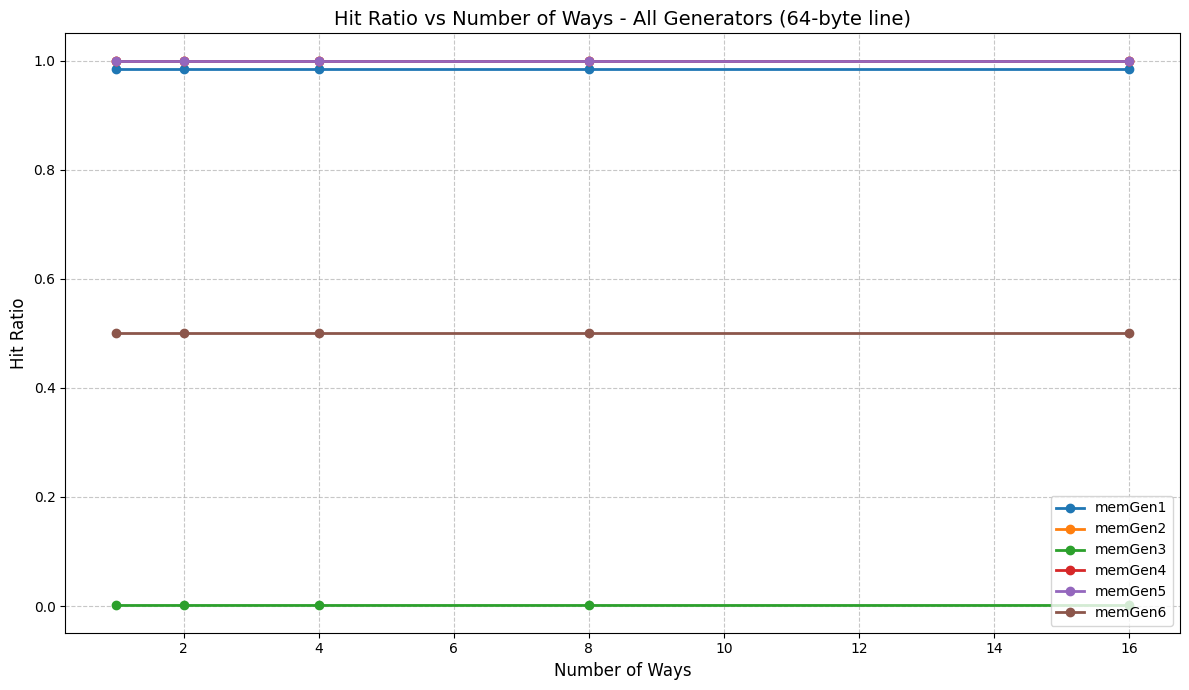

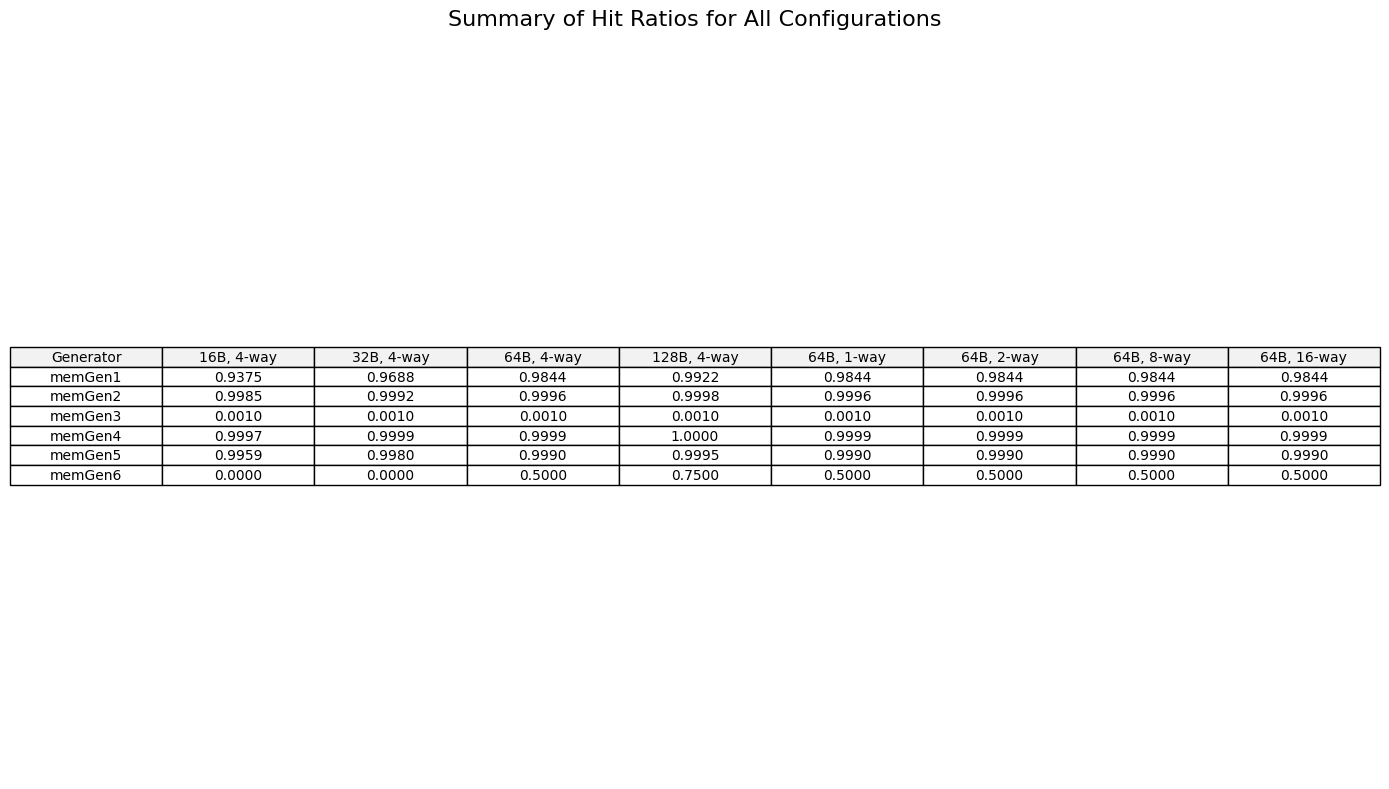

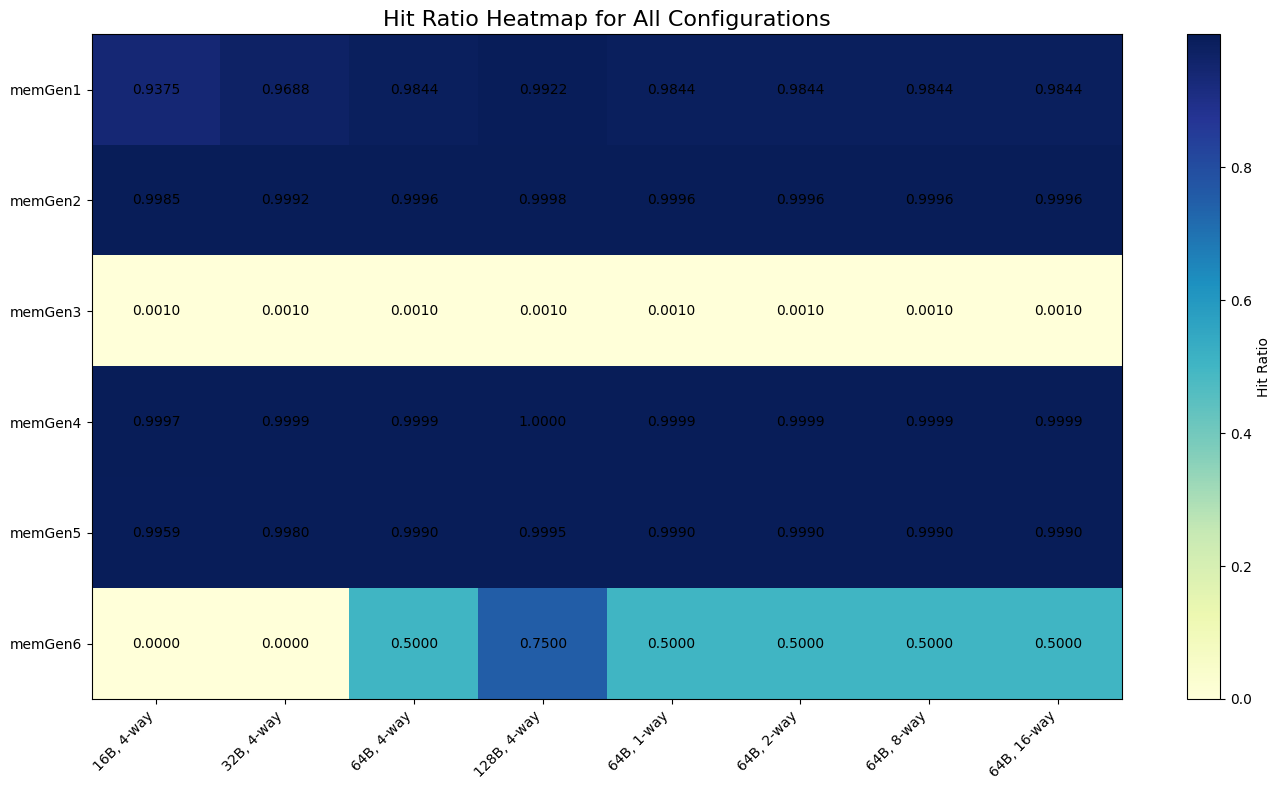


## Analysis of Cache Performance Results

### Impact of Line Size on Hit Ratio

For memGen1:
- Minimum hit ratio: 0.9375 with line size 16 bytes
- Maximum hit ratio: 0.9922 with line size 128 bytes
- Improvement: 5.83%

For memGen2:
- Minimum hit ratio: 0.9985 with line size 16 bytes
- Maximum hit ratio: 0.9998 with line size 128 bytes
- Improvement: 0.13%

For memGen3:
- Minimum hit ratio: 0.0010 with line size 64 bytes
- Maximum hit ratio: 0.0010 with line size 16 bytes
- Improvement: 7.49%

For memGen4:
- Minimum hit ratio: 0.9997 with line size 16 bytes
- Maximum hit ratio: 1.0000 with line size 128 bytes
- Improvement: 0.02%

For memGen5:
- Minimum hit ratio: 0.9959 with line size 16 bytes
- Maximum hit ratio: 0.9995 with line size 128 bytes
- Improvement: 0.36%

For memGen6:
- Minimum hit ratio: 0.0000 with line size 16 bytes
- Maximum hit ratio: 0.7500 with line size 128 bytes
- Improvement: Cannot calculate percentage (from 0 to 0.7500)


### Impact of Associativity on Hit Rat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm

DRAM_SIZE = 64 * 1024 * 1024
CACHE_SIZE = 64 * 1024

class CacheResType:
    MISS = 0
    HIT = 1

class RandomGenerator:
    def __init__(self):
        self.m_w = 0xABABAB55
        self.m_z = 0x05080902

    def rand_(self):
        self.m_z = 36969 * (self.m_z & 65535) + (self.m_z >> 16)
        self.m_w = 18000 * (self.m_w & 65535) + (self.m_w >> 16)
        return (self.m_z << 16) + self.m_w
class MemoryGenerators:
    def __init__(self):
        self.rand_gen = RandomGenerator()
        self.addr1 = 0
        self.addr4 = 0
        self.addr5 = 0
        self.addr6 = 0

    def memGen1(self):
        addr = self.addr1
        self.addr1 = (self.addr1 + 1) % DRAM_SIZE
        return addr

    def memGen2(self):
        return self.rand_gen.rand_() % (24 * 1024)

    def memGen3(self):
        return self.rand_gen.rand_() % DRAM_SIZE

    def memGen4(self):
        addr = self.addr4
        self.addr4 = (self.addr4 + 1) % (4 * 1024)
        return addr

    def memGen5(self):
        addr = self.addr5
        self.addr5 = (self.addr5 + 1) % (1024 * 64)
        return addr

    def memGen6(self):
        addr = self.addr6
        self.addr6 = (self.addr6 + 32) % (64 * 4 * 1024)
        return addr

class CacheLine:
    def __init__(self):
        self.valid = False
        self.tag = 0
        self.last_used = 0

class Cache:
    def __init__(self, cache_size=CACHE_SIZE, line_size=64, ways=4):
        self.cache_size = cache_size
        self.line_size = line_size
        self.ways = ways
        self.num_sets = cache_size // (line_size * ways)

        self.offset_bits = int(np.log2(line_size))
        self.index_bits = int(np.log2(self.num_sets)) if self.num_sets > 1 else 0
        self.tag_bits = 32 - self.offset_bits - self.index_bits

        self.cache = [[CacheLine() for _ in range(ways)] for _ in range(max(1, self.num_sets))]

        self.accesses = 0
        self.hits = 0

    def get_address_parts(self, addr):
        offset = addr & ((1 << self.offset_bits) - 1)
        index = (addr >> self.offset_bits) & ((1 << self.index_bits) - 1) if self.index_bits > 0 else 0
        tag = addr >> (self.offset_bits + self.index_bits)
        return tag, index, offset

    def access(self, addr):
        self.accesses += 1
        tag, index, _ = self.get_address_parts(addr)

        for i in range(self.ways):
            if self.cache[index][i].valid and self.cache[index][i].tag == tag:
                # Cache hit
                self.hits += 1
                self.cache[index][i].last_used = self.accesses
                return CacheResType.HIT

        replace_way = 0
        for i in range(self.ways):
            if not self.cache[index][i].valid:
                replace_way = i
                break
        else:
            min_last_used = float('inf')
            for i in range(self.ways):
                if self.cache[index][i].last_used < min_last_used:
                    min_last_used = self.cache[index][i].last_used
                    replace_way = i

        self.cache[index][replace_way].valid = True
        self.cache[index][replace_way].tag = tag
        self.cache[index][replace_way].last_used = self.accesses

        return CacheResType.MISS

    def get_hit_ratio(self):
        if self.accesses == 0:
            return 0
        return self.hits / self.accesses

    def get_miss_ratio(self):
        return 1 - self.get_hit_ratio()

    def reset_stats(self):
        self.accesses = 0
        self.hits = 0

    def print_config(self):
        print(f"Cache Configuration:")
        print(f"  Cache Size: {self.cache_size} bytes")
        print(f"  Line Size: {self.line_size} bytes")
        print(f"  Ways: {self.ways}")
        print(f"  Number of Sets: {self.num_sets}")
        print(f"  Offset Bits: {self.offset_bits}")
        print(f"  Index Bits: {self.index_bits}")
        print(f"  Tag Bits: {self.tag_bits}")

def run_experiment_vary_line_size(mem_gen_func, ways=4, iterations=1000000):
    line_sizes = [16, 32, 64, 128]
    hit_ratios = []
    miss_ratios = []

    for line_size in tqdm(line_sizes, desc="Testing line sizes"):
        cache = Cache(line_size=line_size, ways=ways)

        for _ in range(iterations):
            addr = mem_gen_func()
            cache.access(addr)

        hit_ratios.append(cache.get_hit_ratio())
        miss_ratios.append(cache.get_miss_ratio())

    return line_sizes, hit_ratios, miss_ratios

def run_experiment_vary_ways(mem_gen_func, line_size=64, iterations=1000000):
    ways_options = [1, 2, 4, 8, 16]
    hit_ratios = []
    miss_ratios = []

    for ways in tqdm(ways_options, desc="Testing ways"):
        cache = Cache(line_size=line_size, ways=ways)

        for _ in range(iterations):
            addr = mem_gen_func()
            cache.access(addr)

        hit_ratios.append(cache.get_hit_ratio())
        miss_ratios.append(cache.get_miss_ratio())

    return ways_options, hit_ratios, miss_ratios

def plot_results(x_values, y_values, x_label, title, generator_name, filename=None):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, 'o-', linewidth=2, markersize=8)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel('Hit Ratio', fontsize=12)
    plt.title(f'{title} - {generator_name}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add data labels
    for i, (x, y) in enumerate(zip(x_values, y_values)):
        plt.annotate(f'{y:.4f}', (x, y), textcoords="offset points",
                     xytext=(0, 10), ha='center', fontsize=10)

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.tight_layout()
    plt.show()

def run_all_experiments(iterations=1000000):
    mem_gens = MemoryGenerators()
    generator_funcs = [
        (mem_gens.memGen1, "memGen1"),
        (mem_gens.memGen2, "memGen2"),
        (mem_gens.memGen3, "memGen3"),
        (mem_gens.memGen4, "memGen4"),
        (mem_gens.memGen5, "memGen5"),
        (mem_gens.memGen6, "memGen6")
    ]

    results = {}

    for gen_func, gen_name in generator_funcs:
        print(f"\nRunning experiments with {gen_name}")

        # Experiment 1: Fixed 4-way, varying line size
        print("Experiment 1: Fixed 4-way, varying line size")
        line_sizes, hit_ratios_line, miss_ratios_line = run_experiment_vary_line_size(gen_func, ways=4, iterations=iterations)
        filename = f"{gen_name}_line_size.png"
        plot_results(line_sizes, hit_ratios_line, 'Line Size (bytes)',
                    'Hit Ratio vs Line Size (4-way)', gen_name, filename)

        # Experiment 2: Fixed 64-byte line size, varying ways
        print("Experiment 2: Fixed 64-byte line size, varying ways")
        ways, hit_ratios_ways, miss_ratios_ways = run_experiment_vary_ways(gen_func, line_size=64, iterations=iterations)
        filename = f"{gen_name}_ways.png"
        plot_results(ways, hit_ratios_ways, 'Number of Ways',
                    'Hit Ratio vs Number of Ways (64-byte line)', gen_name, filename)

        results[gen_name] = {
            'line_size': {'x': line_sizes, 'y': hit_ratios_line, 'miss': miss_ratios_line},
            'ways': {'x': ways, 'y': hit_ratios_ways, 'miss': miss_ratios_ways}
        }

    return results

def validate_cache():
    print("Validating cache functionality...")

    cache = Cache(cache_size=1024, line_size=64, ways=2)
    cache.print_config()

    # Test sequential access pattern
    addr1 = 0
    addr2 = 64  # Different cache line
    addr3 = 128  # Different cache line

    # First access should be a miss
    res1 = cache.access(addr1)
    print(f"First access to addr {addr1}: {'HIT' if res1 == CacheResType.HIT else 'MISS'}")

    # Second access to same address should be a hit
    res2 = cache.access(addr1)
    print(f"Second access to addr {addr1}: {'HIT' if res2 == CacheResType.HIT else 'MISS'}")

    # Access to different cache line should be a miss
    res3 = cache.access(addr2)
    print(f"First access to addr {addr2}: {'HIT' if res3 == CacheResType.HIT else 'MISS'}")

    # Access to third address should be a miss
    res4 = cache.access(addr3)
    print(f"First access to addr {addr3}: {'HIT' if res4 == CacheResType.HIT else 'MISS'}")

    # Access to first address again should be a hit
    res5 = cache.access(addr1)
    print(f"Third access to addr {addr1}: {'HIT' if res5 == CacheResType.HIT else 'MISS'}")

    print(f"Validation complete. Hit ratio: {cache.get_hit_ratio()}")

def generate_summary_plots(results):
    # Comparison of all generators for line size experiment
    plt.figure(figsize=(12, 7))

    for gen_name, data in results.items():
        plt.plot(data['line_size']['x'], data['line_size']['y'], 'o-', linewidth=2, label=gen_name)

    plt.xlabel('Line Size (bytes)', fontsize=12)
    plt.ylabel('Hit Ratio', fontsize=12)
    plt.title('Hit Ratio vs Line Size - All Generators (4-way)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='best')
    plt.savefig('summary_line_size.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    # Comparison of all generators for ways experiment
    plt.figure(figsize=(12, 7))

    for gen_name, data in results.items():
        plt.plot(data['ways']['x'], data['ways']['y'], 'o-', linewidth=2, label=gen_name)

    plt.xlabel('Number of Ways', fontsize=12)
    plt.ylabel('Hit Ratio', fontsize=12)
    plt.title('Hit Ratio vs Number of Ways - All Generators (64-byte line)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='best')
    plt.savefig('summary_ways.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    # Create a table of hit ratios for all configurations
    plt.figure(figsize=(14, 8))
    plt.axis('off')

    table_data = []
    headers = ['Generator', '16B, 4-way', '32B, 4-way', '64B, 4-way', '128B, 4-way',
               '64B, 1-way', '64B, 2-way', '64B, 8-way', '64B, 16-way']

    for gen_name, data in results.items():
        row = [gen_name]
        # Add line size data (all 4 line sizes with 4-way)
        row.extend([f"{val:.4f}" for val in data['line_size']['y']])

        # Add ways data (excluding the duplicate 64B, 4-way)
        ways_data = data['ways']['y']
        row.extend([f"{val:.4f}" for val in [ways_data[0], ways_data[1], ways_data[3], ways_data[4]]])

        table_data.append(row)

    plt.table(cellText=table_data, colLabels=headers, loc='center', cellLoc='center',
              colColours=['#f2f2f2']*len(headers), rowLoc='center')
    plt.title('Summary of Hit Ratios for All Configurations', fontsize=16, pad=20)
    plt.savefig('summary_table.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    # Create a heatmap of hit ratios for all configurations
    plt.figure(figsize=(14, 8))

    # Prepare data for heatmap
    generators = list(results.keys())
    configs = ['16B, 4-way', '32B, 4-way', '64B, 4-way', '128B, 4-way',
               '64B, 1-way', '64B, 2-way', '64B, 8-way', '64B, 16-way']

    heatmap_data = np.zeros((len(generators), len(configs)))

    for i, gen_name in enumerate(generators):
        data = results[gen_name]
        # First 4 columns: line size data with 4-way
        heatmap_data[i, 0:4] = data['line_size']['y']

        # Last 4 columns: ways data with 64B line
        ways_data = data['ways']['y']
        # Add only the 1-way, 2-way, 8-way, and 16-way data (exclude 4-way to avoid duplication)
        heatmap_data[i, 4:8] = [ways_data[0], ways_data[1], ways_data[3], ways_data[4]]

    plt.imshow(heatmap_data, cmap='YlGnBu', aspect='auto')
    cbar = plt.colorbar(label='Hit Ratio')
    cbar.ax.tick_params(labelsize=10)

    # Add text annotations
    for i in range(len(generators)):
        for j in range(len(configs)):
            plt.text(j, i, f"{heatmap_data[i, j]:.4f}",
                     ha="center", va="center", color="black")

    plt.xticks(np.arange(len(configs)), configs, rotation=45, ha="right")
    plt.yticks(np.arange(len(generators)), generators)
    plt.title('Hit Ratio Heatmap for All Configurations', fontsize=16)
    plt.savefig('summary_heatmap.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

def analyze_results(results):
    """Analyze the results and provide insights"""
    print("\n## Analysis of Cache Performance Results\n")

    # Analyze line size impact
    print("### Impact of Line Size on Hit Ratio\n")
    for gen_name, data in results.items():
        line_sizes = data['line_size']['x']
        hit_ratios = data['line_size']['y']
        min_idx = np.argmin(hit_ratios)
        max_idx = np.argmax(hit_ratios)

        print(f"For {gen_name}:")
        print(f"- Minimum hit ratio: {hit_ratios[min_idx]:.4f} with line size {line_sizes[min_idx]} bytes")
        print(f"- Maximum hit ratio: {hit_ratios[max_idx]:.4f} with line size {line_sizes[max_idx]} bytes")

        # Calculate improvement - FIX: Handle division by zero
        if min_idx != max_idx:
            if hit_ratios[min_idx] > 0:
                improvement = (hit_ratios[max_idx] - hit_ratios[min_idx]) / hit_ratios[min_idx] * 100
                print(f"- Improvement: {improvement:.2f}%")
            else:
                # If minimum hit ratio is 0, just report the absolute increase
                print(f"- Improvement: Cannot calculate percentage (from 0 to {hit_ratios[max_idx]:.4f})")
        print()

    # Analyze associativity impact
    print("\n### Impact of Associativity on Hit Ratio\n")
    for gen_name, data in results.items():
        ways = data['ways']['x']
        hit_ratios = data['ways']['y']

        min_idx = np.argmin(hit_ratios)
        max_idx = np.argmax(hit_ratios)

        print(f"For {gen_name}:")
        print(f"- Minimum hit ratio: {hit_ratios[min_idx]:.4f} with {ways[min_idx]}-way associativity")
        print(f"- Maximum hit ratio: {hit_ratios[max_idx]:.4f} with {ways[max_idx]}-way associativity")

        # Calculate improvement - FIX: Handle division by zero
        if min_idx != max_idx:
            if hit_ratios[min_idx] > 0:
                improvement = (hit_ratios[max_idx] - hit_ratios[min_idx]) / hit_ratios[min_idx] * 100
                print(f"- Improvement: {improvement:.2f}%")
            else:
                # If minimum hit ratio is 0, just report the absolute increase
                print(f"- Improvement: Cannot calculate percentage (from 0 to {hit_ratios[max_idx]:.4f})")
        print()

def main(iterations=1000000):
    print("Cache Simulator Project")
    print("======================")

    # Validate cache functionality
    validate_cache()

    # Run all experiments
    print("\nRunning all experiments...")
    start_time = time.time()
    results = run_all_experiments(iterations)
    end_time = time.time()

    print(f"\nAll experiments completed in {end_time - start_time:.2f} seconds")

    print("\nGenerating summary plots...")
    generate_summary_plots(results)

    analyze_results(results)

    print("\nCache simulator project completed successfully!")

    return results

%matplotlib inline

NUM_ITERATIONS = 1000000

results = main(NUM_ITERATIONS)
